In [2]:
import pandas as pd 
from lazypredict.Supervised import LazyClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("Breast_cancer_data.csv")

In [4]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.00,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0
2,19.69,21.25,130.00,1203.00,0.11,0
3,11.42,20.38,77.58,386.10,0.14,0
4,20.29,14.34,135.10,1297.00,0.10,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11,0
565,20.13,28.25,131.20,1261.00,0.10,0
566,16.60,28.08,108.30,858.10,0.08,0
567,20.60,29.33,140.10,1265.00,0.12,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df["diagnosis"]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [7]:
df["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
X = df[["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]]
Y = df["diagnosis"]

In [9]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.00,0.12
1,20.57,17.77,132.90,1326.00,0.08
2,19.69,21.25,130.00,1203.00,0.11
3,11.42,20.38,77.58,386.10,0.14
4,20.29,14.34,135.10,1297.00,0.10
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11
565,20.13,28.25,131.20,1261.00,0.10
566,16.60,28.08,108.30,858.10,0.08
567,20.60,29.33,140.10,1265.00,0.12


In [10]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state = 0)

In [12]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None) 
models, predictions= clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

100%|██████████| 29/29 [00:03<00:00,  8.77it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.95               0.95     0.95      0.95   
RandomForestClassifier             0.95               0.94     0.94      0.95   
ExtraTreesClassifier               0.94               0.93     0.93      0.94   
BaggingClassifier                  0.93               0.93     0.93      0.93   
XGBClassifier                      0.94               0.93     0.93      0.94   
RidgeClassifier                    0.94               0.92     0.92      0.94   
LinearDiscriminantAnalysis         0.94               0.92     0.92      0.94   
RidgeClassifierCV                  0.94               0.92     0.92      0.94   
SGDClassifier                      0.93               0.92     0.92      0.93   
DecisionTreeClassifier             0.92               0.92     0.92      0.92   
LogisticRegression          

In [13]:
Model = list(models["Accuracy"].keys())

In [14]:
Accuracy = list(models["Accuracy"])

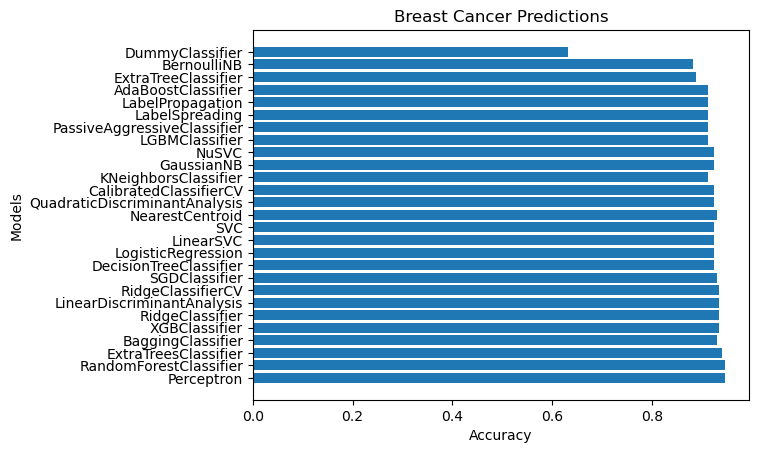

In [19]:
import matplotlib.pyplot as plt 

plt.barh(Model, Accuracy, align='center')
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Breast Cancer Predictions")
plt.savefig('graph.png')
plt.show()
